## Chap06-02. DropOut
### 과적합(Overfitting) 방지 기법 중 하나인 Dropout을 사용

* 학습 시 전체 신경망 중 일부만 사용하도록 하는것
* 즉, 학습 단계마다 일부 뉴런을 제거(사용하지 않도록)함
* 일부 특징이 특정 뉴런들에 고정되는 것을 막아 가중치($W_1, W_2, ..., W_n$)의 균형을 잡음

In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# 1. 데이터 로드
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
# 2. 신경망 모델 구성

# 1) Input(X), Output(Y), dropout 확률 설정(keep_prob)
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 2) 신경망 레이어(layer) 설정
# Input[Batch,784] -> Hidden(1)[256] -> Hidden(2)[256] -> Output[Batch, 10]

# 1st layer
W1 = tf.get_variable(name='W1', shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
L1 = tf.nn.relu(tf.matmul(X, W1))
# tensorflow에 내장된 함수를 이용하여 dropout 적용
# 함수에 적용할 layer와 확률(keep_prob)만 넣어주면 됨
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# 2nd layer
W2 = tf.get_variable(name='W2', shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# output layer
W3 = tf.get_variable(name='W3', shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
model = tf.matmul(L2, W3)

In [4]:
# 3) 손실함수(Loss function) 설정
cost = tf.losses.softmax_cross_entropy(logits=model, onehot_labels=Y)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [5]:
# 3. 신경망 모델 학습

# 1) 세션 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 2) batch size 설정
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 3) 최적화 진행
for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs,
                                                             Y: batch_ys,
                                                             keep_prob: 0.8})
        total_cost += cost_val
        
    print('Epoch: {:04d}, Avg. cost = {:.3f}'.format((epoch+1), (total_cost / total_batch)))
    
print("최적화 완료!")

Epoch: 0001, Avg. cost = 0.306
Epoch: 0002, Avg. cost = 0.126
Epoch: 0003, Avg. cost = 0.092
Epoch: 0004, Avg. cost = 0.075
Epoch: 0005, Avg. cost = 0.062
Epoch: 0006, Avg. cost = 0.053
Epoch: 0007, Avg. cost = 0.048
Epoch: 0008, Avg. cost = 0.043
Epoch: 0009, Avg. cost = 0.038
Epoch: 0010, Avg. cost = 0.036
Epoch: 0011, Avg. cost = 0.031
Epoch: 0012, Avg. cost = 0.030
Epoch: 0013, Avg. cost = 0.027
Epoch: 0014, Avg. cost = 0.024
Epoch: 0015, Avg. cost = 0.024
Epoch: 0016, Avg. cost = 0.024
Epoch: 0017, Avg. cost = 0.024
Epoch: 0018, Avg. cost = 0.021
Epoch: 0019, Avg. cost = 0.022
Epoch: 0020, Avg. cost = 0.018
Epoch: 0021, Avg. cost = 0.020
Epoch: 0022, Avg. cost = 0.021
Epoch: 0023, Avg. cost = 0.018
Epoch: 0024, Avg. cost = 0.015
Epoch: 0025, Avg. cost = 0.018
Epoch: 0026, Avg. cost = 0.017
Epoch: 0027, Avg. cost = 0.019
Epoch: 0028, Avg. cost = 0.017
Epoch: 0029, Avg. cost = 0.014
Epoch: 0030, Avg. cost = 0.015
최적화 완료!


In [6]:
# 4. 결과 확인
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 테스트, 즉 예측 시에는 keep_prob=1을 넣어 신경망 전체를 사용하도록 해야함
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images,
                                               Y: mnist.test.labels,
                                               keep_prob: 1}))

정확도: 0.9843


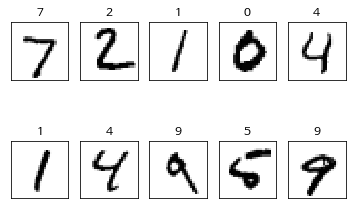

In [9]:
# 5. 결과 확인 : matplotlib
labels = sess.run(model, feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels,
                                    keep_prob: 1})

fig = plt.figure()
for i in range(10):
    # 2행 5열의 그래프를 만들고, i+1번째에 숫자 이미지를 출력
    subplot = fig.add_subplot(2, 5, i+1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않음
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    # 1차원 배열로 되어있는 i번째 이미지 데이터를
    # 28x28 형식의 2차원 배열로 변형하여 이미지 형태로 출력
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)

plt.show()